<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

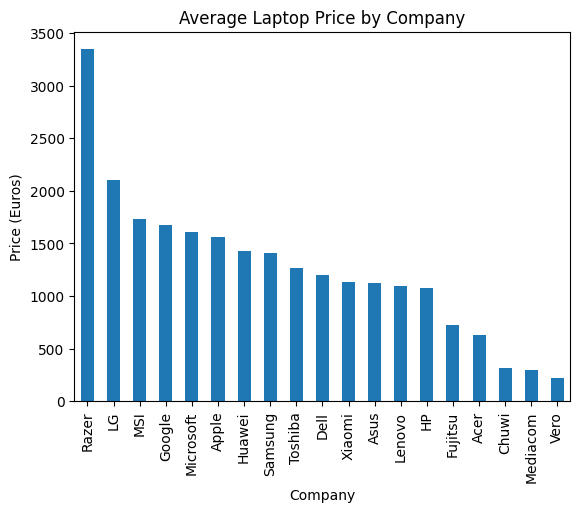

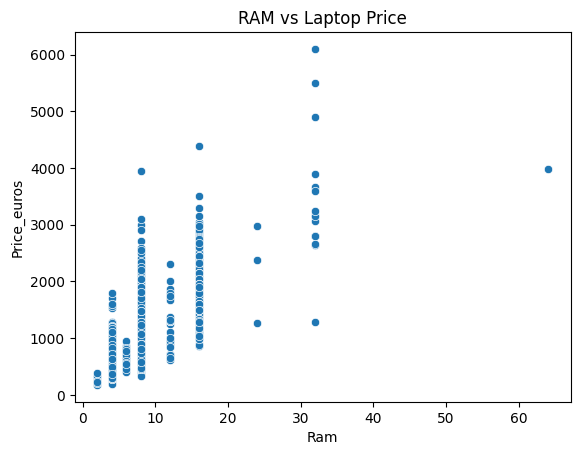

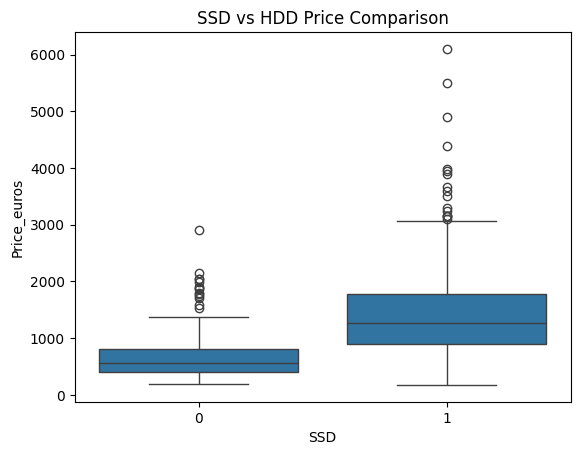

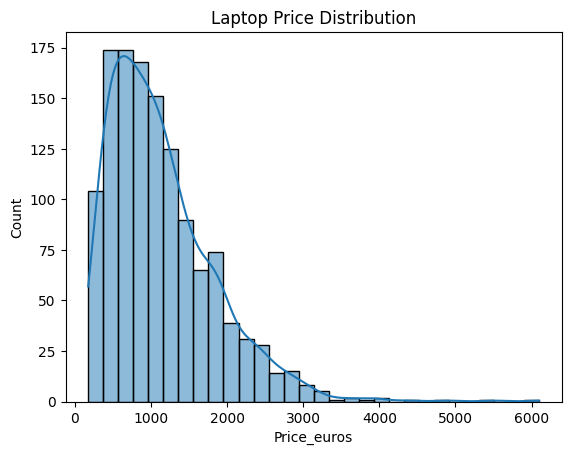

Linear Regression R2: 0.6950064456306406
Linear Regression MAE: 286.6567170861232
Random Forest R2: 0.8264563982665563
Random Forest MAE: 200.02854283052523


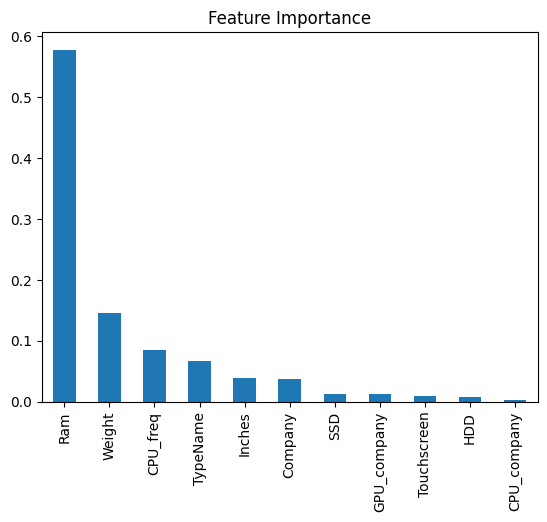

'\nKEY INSIGHTS:\n- RAM, CPU frequency, and SSD strongly influence laptop prices\n- Touchscreen laptops are costlier\n- Apple & premium brands dominate high-price segment\n- Random Forest gives better accuracy than Linear Regression\n\nCONCLUSION:\nThis project demonstrates end-to-end Data Analytics using:\nPython, Machine Learning, SQL-ready dataset, and Excel-ready output\n'

In [ ]:
# ============================================================
# Laptop Price Analysis & Prediction
# Dataset: Laptop Prices
# Tools: Python, ML, SQL-ready, Excel-ready
# ============================================================


# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')



# 2. LOAD DATASET

file_path = "laptop_prices.csv"
df = pd.read_csv(r"C:\Users\RUPALI\Desktop\Laptop\laptop_prices.csv")

df.head()



# 3. BASIC INFORMATION

df.shape
df.info()
df.describe()



# 4. DATA CLEANING

df.drop_duplicates(inplace=True)

# Convert RAM to numeric
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '').astype(int)


# Convert Weight to numeric
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '').astype(float)



# Price column already numeric (Price_euros)
df['Price_euros'] = df['Price_euros'].astype(float)

df.head()



# 5. FEATURE ENGINEERING

# SSD / HDD flags
df['SSD'] = df['PrimaryStorageType'].apply(lambda x: 1 if x == 'SSD' else 0)
df['HDD'] = df['PrimaryStorageType'].apply(lambda x: 1 if x == 'HDD' else 0)

# Touchscreen as numeric
df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})


df[['PrimaryStorageType', 'SSD', 'HDD']].head()




# 6. EXPLORATORY DATA ANALYSIS


# Average price by company
plt.figure()
df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Laptop Price by Company")
plt.ylabel("Price (Euros)")
plt.show()

# RAM vs Price
plt.figure()
sns.scatterplot(x='Ram', y='Price_euros', data=df)
plt.title("RAM vs Laptop Price")
plt.show()

# SSD vs HDD
plt.figure()
sns.boxplot(x='SSD', y='Price_euros', data=df)
plt.title("SSD vs HDD Price Comparison")
plt.show()

# Price distribution
plt.figure()
sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title("Laptop Price Distribution")
plt.show()



# 7. ENCODING CATEGORICAL FEATURES

le = LabelEncoder()

cat_cols = [
    'Company', 'TypeName', 'OS',
    'CPU_company', 'CPU_model',
    'GPU_company'
]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


# 8. FEATURE SELECTION

X = df[
    [
        'Company', 'TypeName', 'Inches', 'Ram', 'Weight',
        'Touchscreen', 'SSD', 'HDD',
        'CPU_company', 'CPU_freq', 'GPU_company'
    ]
]

y = df['Price_euros']



# 9. TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# 10. LINEAR REGRESSION

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))



# 11. RANDOM FOREST REGRESSOR

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))



# 12. FEATURE IMPORTANCE

importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure()
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()



# 13. PRICE PREDICTION (NEW DATA)

sample = pd.DataFrame({
    'Company': [1],
    'TypeName': [2],
    'Inches': [15.6],
    'Ram': [16],
    'Weight': [1.8],
    'Touchscreen': [0],
    'SSD': [1],
    'HDD': [0],
    'CPU_company': [1],
    'CPU_freq': [2.5],
    'GPU_company': [1]
})

rf.predict(sample)



# 14. SAVE CLEAN DATA

df.to_csv("cleaned_laptop_data.csv", index=False)



# 15. FINAL INSIGHTS

"""
KEY INSIGHTS:
- RAM, CPU frequency, and SSD strongly influence laptop prices
- Touchscreen laptops are costlier
- Apple & premium brands dominate high-price segment
- Random Forest gives better accuracy than Linear Regression

CONCLUSION:
This project demonstrates end-to-end Data Analytics using:
Python, Machine Learning, SQL-ready dataset, and Excel-ready output
"""


In [2]:
print(df.columns)


Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')


In [3]:
df['Ram'].dtype


dtype('int64')

In [2]:
df['Touchscreen'].value_counts()


Touchscreen
No     1087
Yes     188
Name: count, dtype: int64